In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

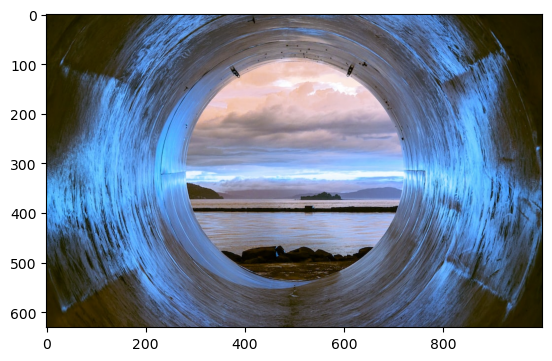

In [3]:
img = cv2.imread("sample.jpeg", cv2.IMREAD_UNCHANGED);
plt.imshow(img);

In [4]:
print(img.shape)

(631, 1000, 3)


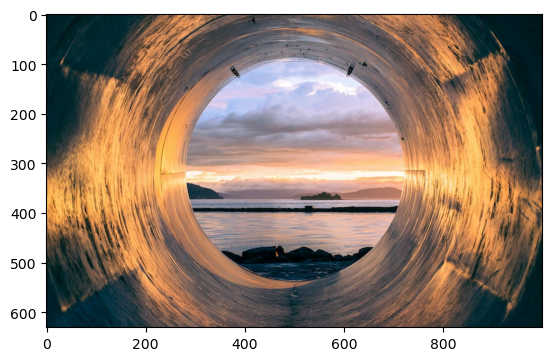

In [6]:
#BGR to RGB changing the order of the channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
#flatening the image
# Reshape the image to a 2d array of pixels and 3 color values (RGB)
pixel_values = img.reshape((-1, 3))

#Converting to float
pixel_values = np.float32(pixel_values)

In [8]:
#printing the image
print(pixel_values.shape)

(631000, 3)


In [11]:
#Stopping criterion 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [12]:
#Number of clusters
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [13]:
#Parameters
centers = np.uint8(centers)

#Flatten the labels array
labels = labels.flatten()

In [14]:
#Final image formation 
segmented_image = centers[labels.flatten()]

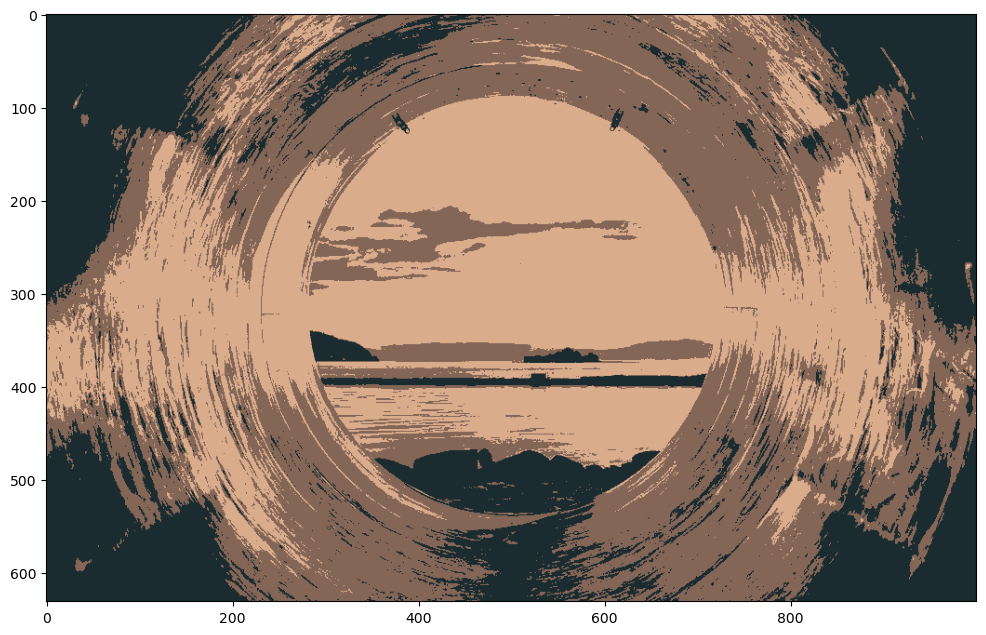

In [15]:
#Reshape back to the original image 
segmented_image = segmented_image.reshape(img.shape)

#Show the image 
plt.figure(figsize=(12, 10))
plt.imshow(segmented_image)
plt.show()

In [16]:
#Analysis
#Disable the cluster number 0,1 and 2 (turning the pixel into black)
masked_image0 = np.copy(img)
masked_image1 = np.copy(img)
masked_image2 = np.copy(img)

#Convert to the shape of a vector of pixel values
masked_image0 = masked_image0.reshape((-1, 3))
masked_image1 = masked_image1.reshape((-1, 3))
masked_image2 = masked_image2.reshape((-1, 3))

#Disabling cluster 0
cluster = 0
masked_image0[labels == cluster] = [0,0,0]

#Disabling cluster 1
cluster = 1
masked_image0[labels == cluster] = [0,0,0]

#Disabling cluster 2
cluster = 2
masked_image0[labels == cluster] = [0,0,0]

#Converting back to the original shape
masked_image0 = masked_image0.reshape(img.shape)
masked_image1 = masked_image1.reshape(img.shape)
masked_image2 = masked_image2.reshape(img.shape)

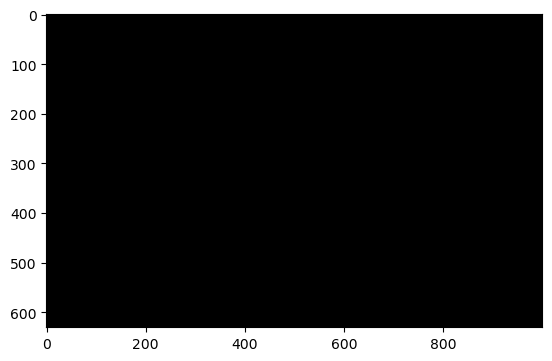

In [17]:
#Cluster 0 disabled
plt.imshow(masked_image0)
plt.show()

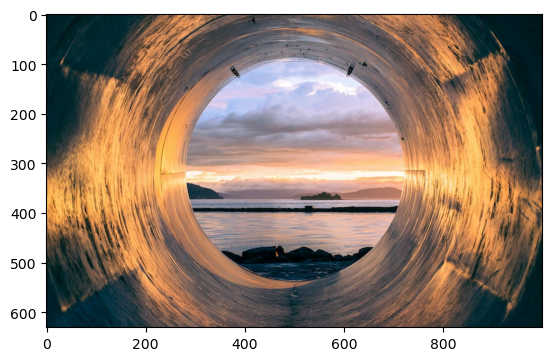

In [18]:
#Cluster 1 disabled
plt.imshow(masked_image1)
plt.show()

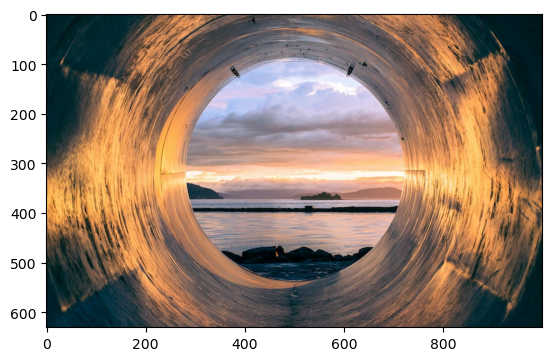

In [19]:
#Cluster 2 disabled
plt.imshow(masked_image2)
plt.show()